In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [3]:
np.random.seed(0)

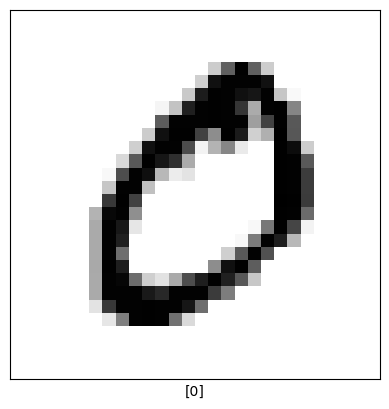

In [4]:
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [8]:
x_train = x_train.reshape(-1,28, 28,1)
x_test = x_test.reshape(-1,28, 28, 1)

In [9]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10


700/700 [==============================] - 25s 33ms/step - loss: 0.5841 - accuracy: 0.8121 - val_loss: 0.2158 - val_accuracy: 0.9396
Epoch 2/10
700/700 [==============================] - 29s 42ms/step - loss: 0.2821 - accuracy: 0.9124 - val_loss: 0.1522 - val_accuracy: 0.9568
Epoch 3/10
700/700 [==============================] - 24s 34ms/step - loss: 0.2171 - accuracy: 0.9334 - val_loss: 0.1220 - val_accuracy: 0.9646
Epoch 4/10
700/700 [==============================] - 27s 38ms/step - loss: 0.1773 - accuracy: 0.9454 - val_loss: 0.1005 - val_accuracy: 0.9708
Epoch 5/10
700/700 [==============================] - 22s 31ms/step - loss: 0.1504 - accuracy: 0.9525 - val_loss: 0.0863 - val_accuracy: 0.9734
Epoch 6/10
700/700 [==============================] - 24s 35ms/step - loss: 0.1337 - accuracy: 0.9579 - val_loss: 0.0787 - val_accuracy: 0.9758
Epoch 7/10
700/700 [==============================] - 26s 38ms/step - loss: 0.1221 - accuracy: 0.9626 - val_loss: 0.0714 - val_accurac

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9853000044822693


In [11]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 2s 7ms/step


array([4.8376785e-07, 1.8441737e-08, 6.4765209e-06, 1.1851309e-05,
       2.5851402e-10, 6.0738694e-09, 2.7563724e-12, 9.9997866e-01,
       2.1502876e-08, 2.4345118e-06], dtype=float32)

In [12]:
np.argmax(predictions[0])

7

In [13]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

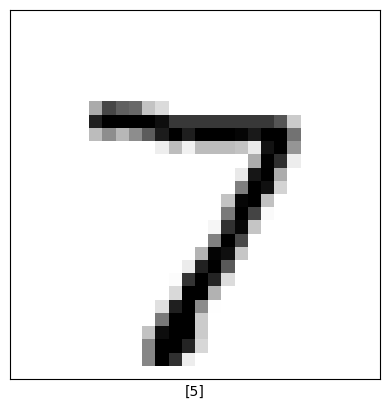

In [14]:
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')

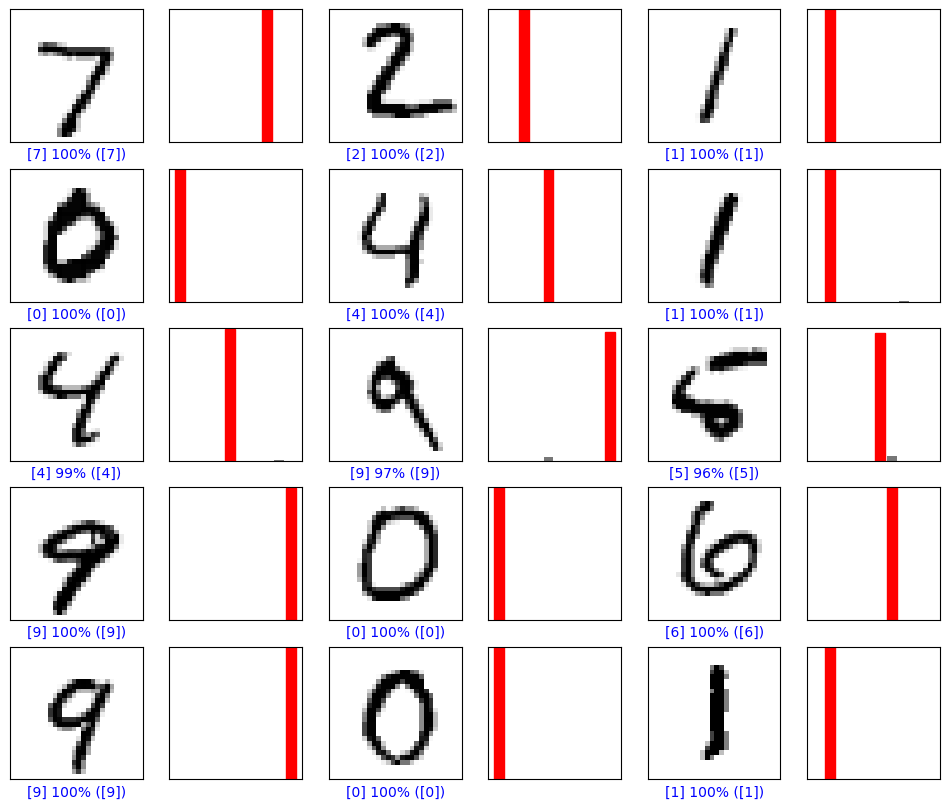

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np


y_pred = np.argmax(predictions, axis=1)
                   
precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

f_score = f1_score(y_test, y_pred, average='weighted')

accuracy = score[1]

print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)
print("Accuracy:", accuracy)


Precision: 0.9853374547412376
Recall: 0.9853
F-score: 0.9852959746437907
Accuracy: 0.9853000044822693


313/313 [==============================] - 2s 6ms/step


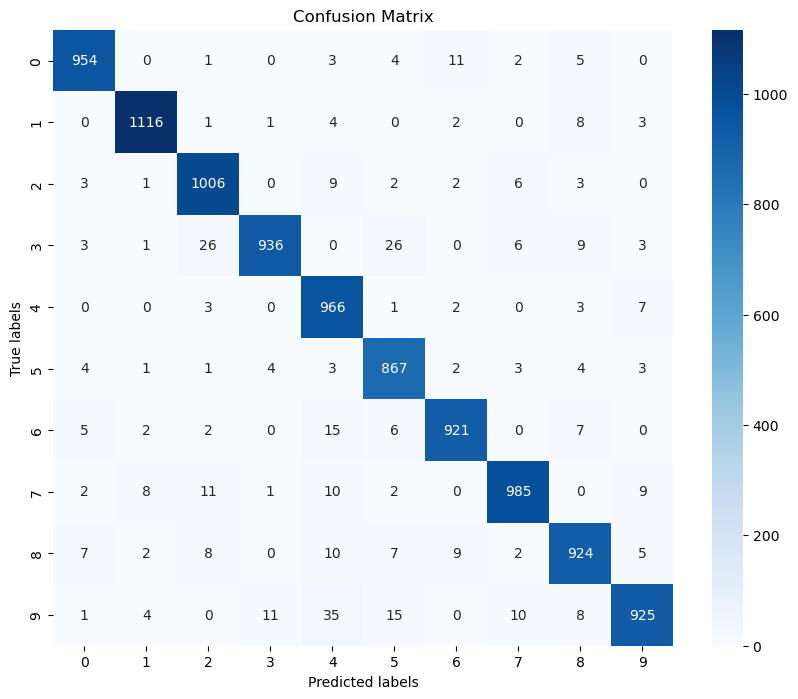

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape, "x_test shape:", x_test.shape, "y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [20]:
np.random.seed(0)

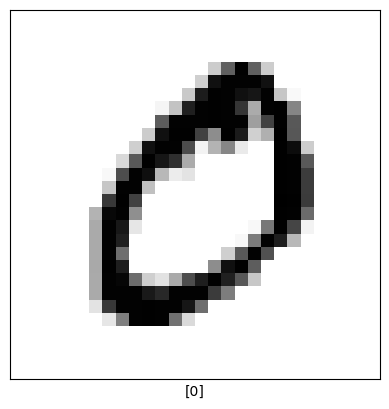

In [21]:
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1], cmap=plt.cm.binary)

In [22]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [23]:
import tensorflow as tf

# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=128, input_shape=(28, 28)),
    tf.keras.layers.Dense(2825, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               20096     
                                                                 
 dense_2 (Dense)             (None, 2825)              364425    
                                                                 
 dense_3 (Dense)             (None, 10)                28260     
                                                                 
Total params: 412781 (1.57 MB)
Trainable params: 412781 (1.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [26]:
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

In [27]:
model_log = model.fit(x_train, y_train,
                      batch_size=128,
                      epochs=5,
                      verbose=1,
                      validation_split=0.3)

Epoch 1/5
329/329 [==============================] - 9s 23ms/step - loss: 0.4104 - accuracy: 0.8732 - val_loss: 0.2074 - val_accuracy: 0.9364
Epoch 2/5
329/329 [==============================] - 8s 23ms/step - loss: 0.1774 - accuracy: 0.9440 - val_loss: 0.1572 - val_accuracy: 0.9502
Epoch 3/5
329/329 [==============================] - 6s 18ms/step - loss: 0.1344 - accuracy: 0.9581 - val_loss: 0.1322 - val_accuracy: 0.9604
Epoch 4/5
329/329 [==============================] - 6s 18ms/step - loss: 0.1101 - accuracy: 0.9660 - val_loss: 0.1249 - val_accuracy: 0.9609
Epoch 5/5
329/329 [==============================] - 6s 19ms/step - loss: 0.0940 - accuracy: 0.9707 - val_loss: 0.1231 - val_accuracy: 0.9611


In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9639000296592712


In [29]:
predictions = model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 4ms/step
[3.24921587e-07 7.29826226e-08 1.51223590e-04 1.94160297e-04
 3.15341779e-08 1.33023004e-09 1.08648465e-10 9.99626160e-01
 8.77057346e-07 2.72063717e-05]
7


In [30]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                          100 * np.max(predictions_array),
                                          true_label),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')

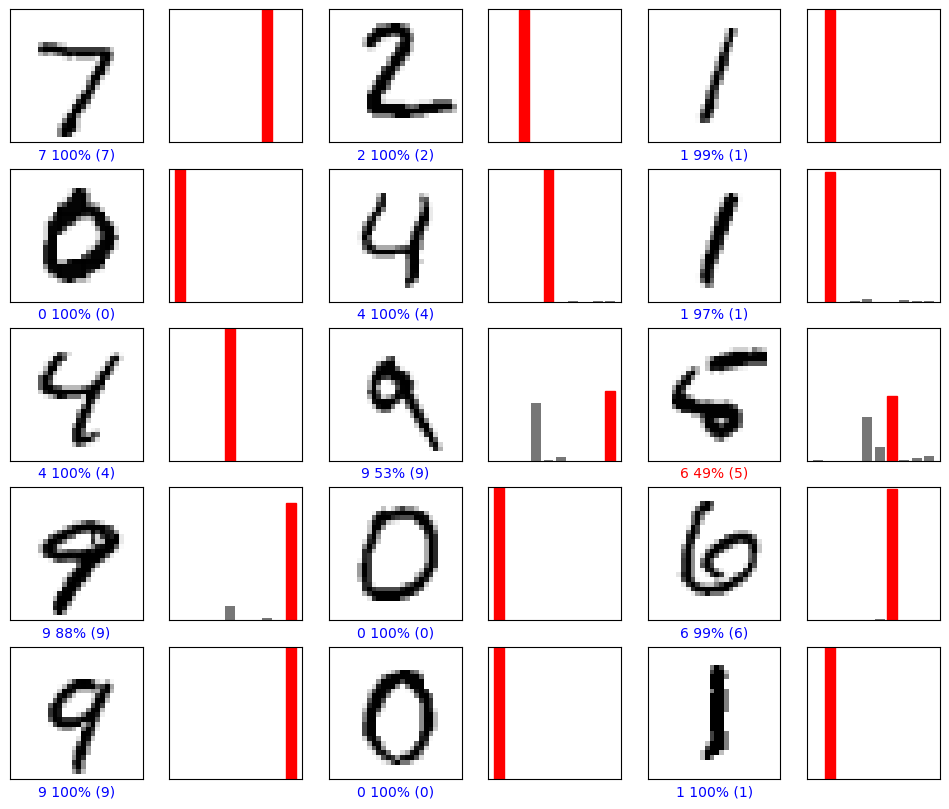

In [31]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test)
plt.show()

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score


y_pred = np.argmax(predictions, axis=1)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

f_score = f1_score(y_test, y_pred, average='weighted')

accuracy = score[1]

print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)
print("Accuracy:", accuracy)

Precision: 0.9639775648814922
Recall: 0.9639
F-score: 0.9638383821057341
Accuracy: 0.9639000296592712


313/313 [==============================] - 2s 6ms/step


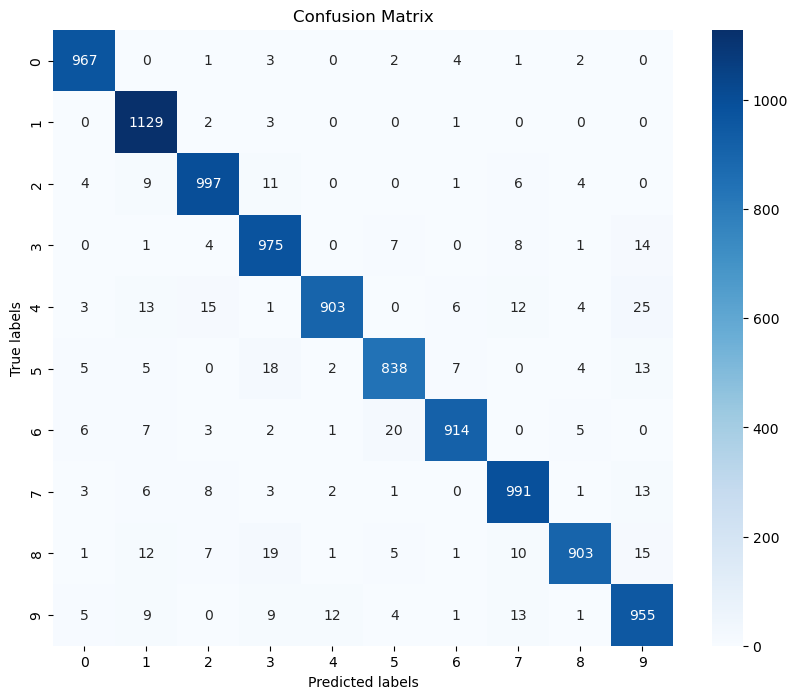

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()